In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load CSV (faster to convert to Parquet first if needed) ---
file_path = r"Edit path"
df = pd.read_csv(file_path)

C:\Users\RC Sinay\AppData\Local\Temp\ipykernel_31060\257373336.py:6: DtypeWarning: Columns (3,13,14,20,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12235039 entries, 0 to 12235038
Data columns (total 42 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   service_request_number    object        
 1   service_request_type      object        
 2   SR_SHORT_CODE             object        
 3   CREATED_DEPARTMENT        object        
 4   OWNER_DEPARTMENT          object        
 5   status                    object        
 6   how_reported              object        
 7   creation_date             datetime64[ns]
 8   LAST_MODIFIED_DATE        object        
 9   completion_date           datetime64[ns]
 10  STREET_ADDRESS            object        
 11  CITY                      object        
 12  STATE                     object        
 13  zip_code                  object        
 14  STREET_NUMBER             object        
 15  STREET_DIRECTION          object        
 16  STREET_NAME               object        
 17  STREET

In [2]:
# --- Rename and parse dates ---
df = df.rename(columns={
    'SR_NUMBER': 'service_request_number',
    'SR_TYPE': 'service_request_type',
    'STATUS': 'status',
    'ORIGIN': 'how_reported',
    'CREATED_DATE': 'creation_date',
    'CLOSED_DATE': 'completion_date',
    'ZIP_CODE': 'zip_code',
    'WARD': 'ward',
    'POLICE_DISTRICT': 'police_district',
    'COMMUNITY_AREA': 'community_area'
})

df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')

# --- 1. Channel Usage (Fast) ---
channel_usage = df['how_reported'].value_counts()
print("\n📞 Most Used Reporting Channels:\n")
print(channel_usage)



C:\Users\RC Sinay\AppData\Local\Temp\ipykernel_31060\2423038384.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')



📞 Most Used Reporting Channels:

how_reported
Phone Call                     7056397
Internet                       3276940
Mobile Device                   893937
Mass Entry                      456701
Alderman's Office               405178
Salesforce Mobile App            28671
DWM                              28485
SPOTCSR                          24169
Generated In House               21691
spot-open311-SeeClickFix         10341
spot-open311-Chicago+Works       10141
City Department                   4748
E-Mail                            4407
WOFromTerraGo                     3579
spot-open311-CHITEXT              2296
CSCC                              1392
Spot311 Interface                  982
XTERFACE                           967
Phone                              953
Walk-in                            661
Open311                            549
Chicago Police Department          443
Mail                               395
Open311 Interface                  195
Web              


📍 Top ZIP Codes by Request Count:

zip_code
60612.0    4408751
60666.0    2034485
60628.0     201294
60617.0     196979
60629.0     185817
60618.0     175798
60632.0     172863
60620.0     172688
60623.0     166037
60647.0     163946
Name: count, dtype: int64


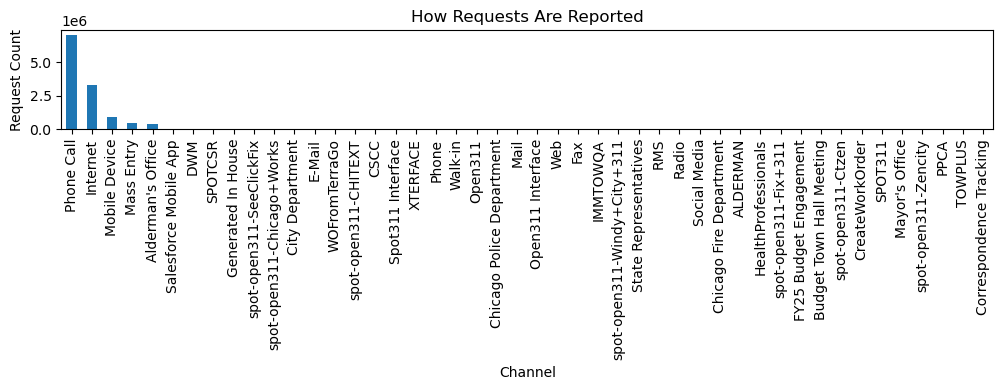

In [3]:
# --- 2. Top ZIP Codes by Volume (Fast) ---
top_zip = df['zip_code'].value_counts().head(10)
print("\n📍 Top ZIP Codes by Request Count:\n")
print(top_zip)

# --- 3. Optional: Channel Usage Plot ---
channel_usage.plot(kind='bar', title='How Requests Are Reported', figsize=(10, 4))
plt.xlabel('Channel')
plt.ylabel('Request Count')
plt.tight_layout()
plt.show()


C:\Users\RC Sinay\AppData\Local\Temp\ipykernel_31060\4022467585.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['completion_date'] = pd.to_datetime(df['completion_date'], errors='coerce')
C:\Users\RC Sinay\AppData\Local\Temp\ipykernel_31060\4022467585.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


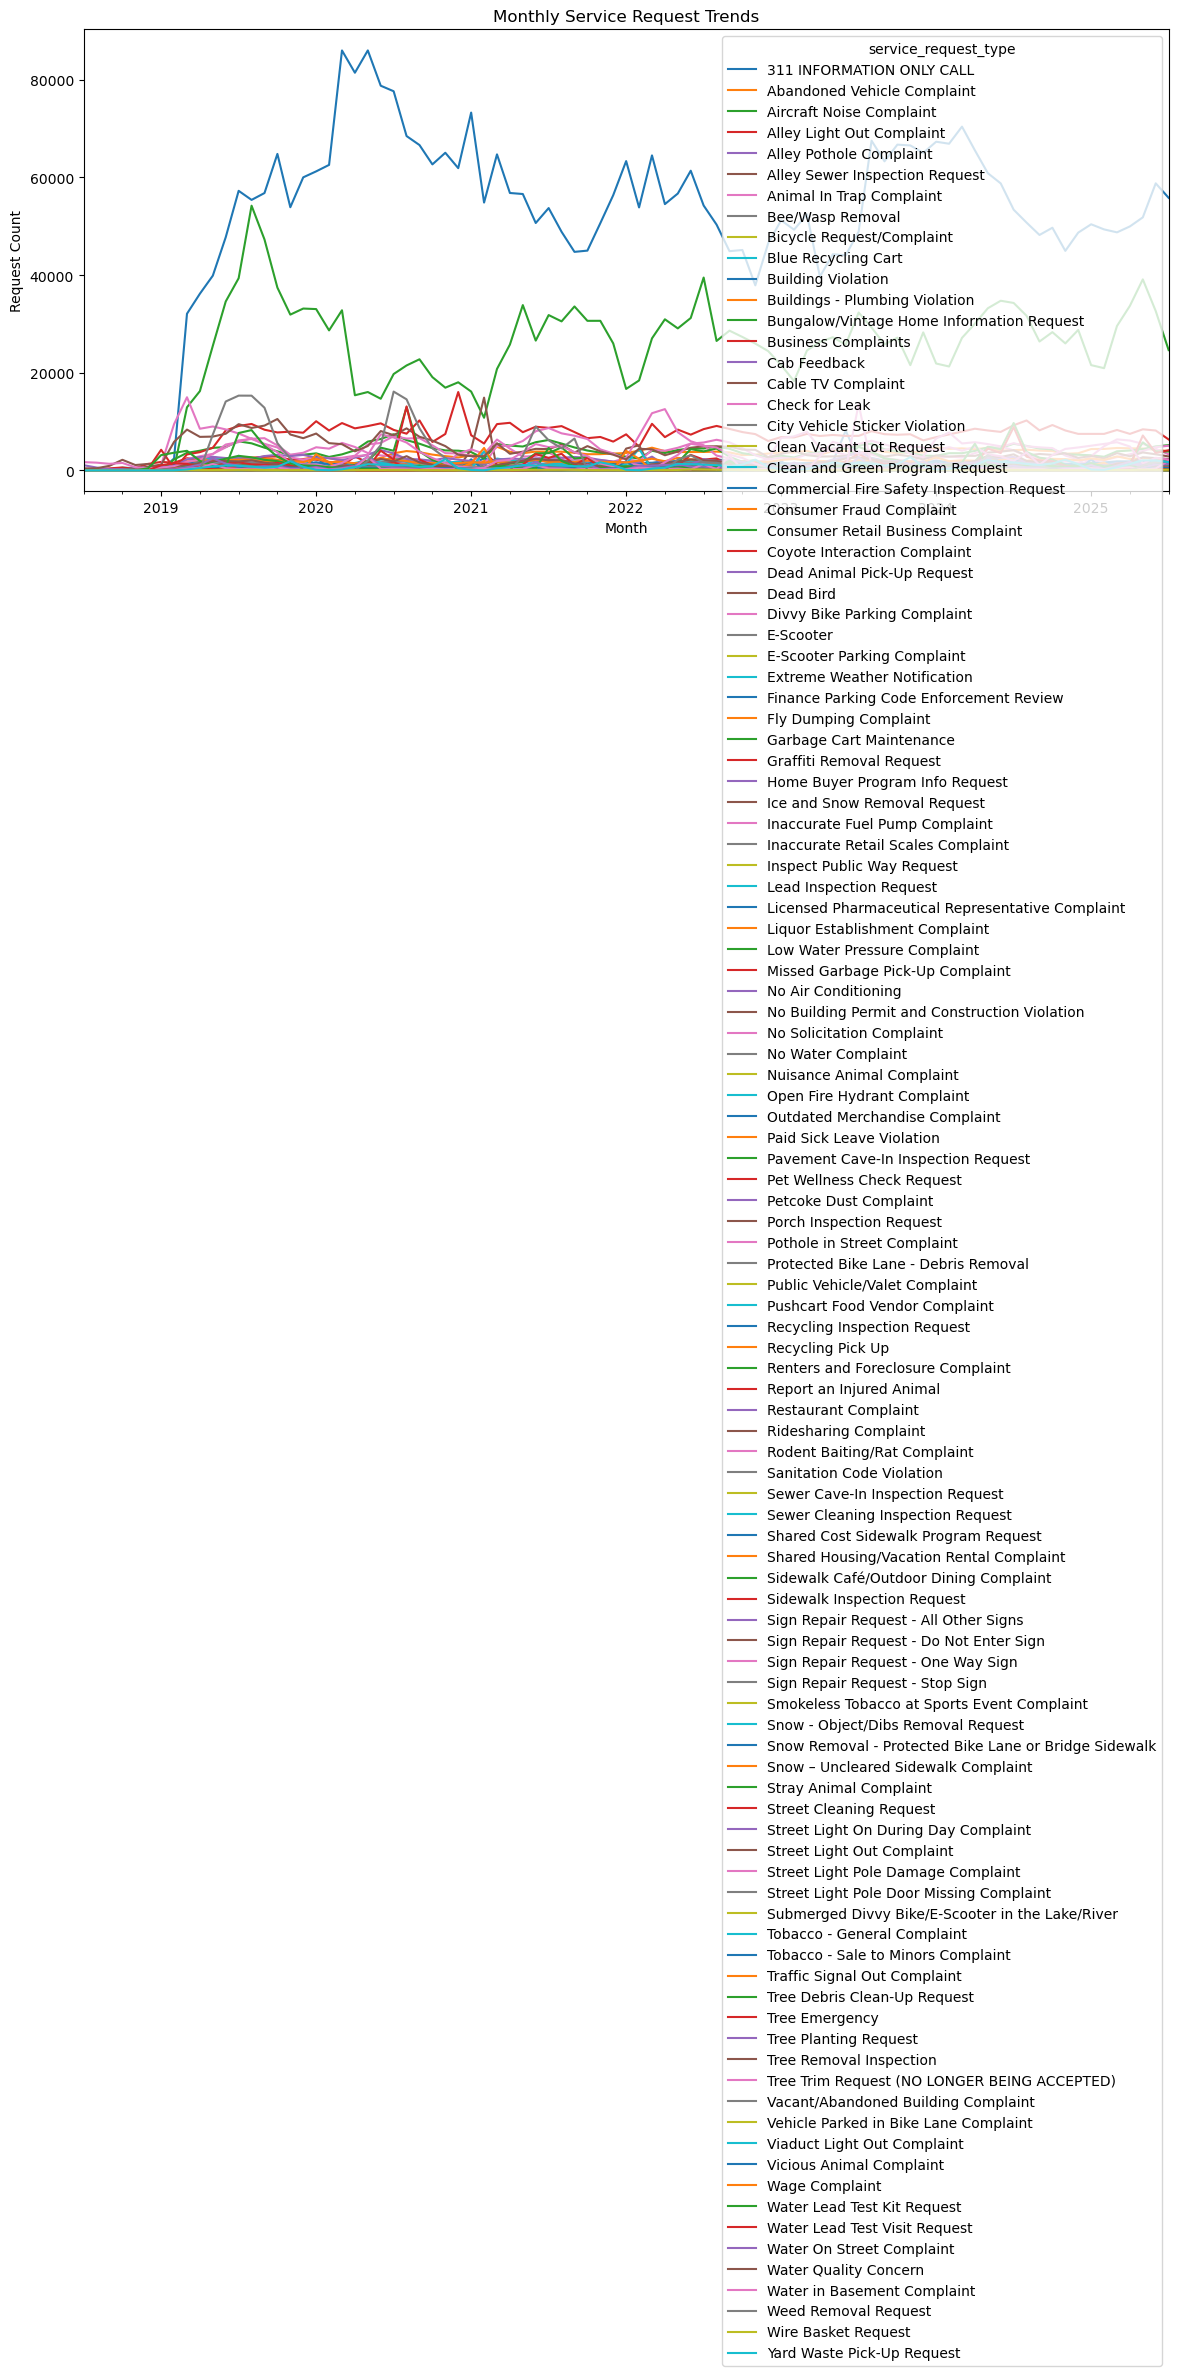


⏱️ Average Days to Close per Request Type:

service_request_type
Aircraft Noise Complaint                   0.000000
Extreme Weather Notification               0.000000
E-Scooter                                  0.000000
Vehicle Parked in Bike Lane Complaint      0.000000
311 INFORMATION ONLY CALL                  0.002316
Finance Parking Code Enforcement Review    0.026429
Vicious Animal Complaint                   0.177608
Report an Injured Animal                   0.178372
Ice and Snow Removal Request               0.194482
Animal In Trap Complaint                   0.642970
Name: days_to_close, dtype: float64

🌤️ Requests by Season (Top Types):

service_request_type  311 INFORMATION ONLY CALL  Abandoned Vehicle Complaint  \
season                                                                         
Fall                                     977709                        59727   
Spring                                  1199337                        74307   
Summer               

In [4]:
# --- Continue from earlier script ---
df['completion_date'] = pd.to_datetime(df['completion_date'], errors='coerce')

# --- 4. Monthly Trends ---
df['month'] = df['creation_date'].dt.to_period('M')
monthly_trends = df.groupby(['month', 'service_request_type']).size().unstack(fill_value=0)
monthly_trends.plot(figsize=(14, 6), title='Monthly Service Request Trends')
plt.xlabel('Month')
plt.ylabel('Request Count')
plt.tight_layout()
plt.show()

# --- 5. Request Efficiency ---
df['days_to_close'] = (df['completion_date'] - df['creation_date']).dt.days
efficiency = df.groupby('service_request_type')['days_to_close'].mean().sort_values()
print("\n⏱️ Average Days to Close per Request Type:\n")
print(efficiency.head(10))

# --- 6. Seasonal Trends ---
def classify_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['creation_date'].dt.month.apply(classify_season)
seasonal = df.groupby(['season', 'service_request_type']).size().unstack(fill_value=0)
print("\n🌤️ Requests by Season (Top Types):\n")
print(seasonal.head())
